# Data Exploration

In [1]:
# Load the dataset merged_data.csv

import pandas as pd
from collections import Counter
import seaborn as sns
import os
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/local_data/merged_data.csv')


C:\Users\Bruno\AppData\Local\Temp\ipykernel_18756\671835000.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/local_data/merged_data.csv')


In [2]:
# Display the first 5 rows of the dataset
df.head()

,Census Section,District,Date,Use,Number of Meters,Accumulated Consumption,Max Temperature,Min Temperature,Precipitation,Tourist Accommodations,Hotel Overnight Stays
0,801901001,1,2021-01-01,Commercial,56,2710,7.55,4.30,5.65,3500,8700
1,801901001,1,2021-01-01,Domestic,322,10058,7.55,4.30,5.65,3500,8700
2,801901001,1,2021-01-01,Industrial,10,140646,7.55,4.30,5.65,3500,8700
3,801901001,1,2021-01-02,Commercial,56,3573,8.55,1.55,0.00,6369,15828
4,801901001,1,2021-01-02,Domestic,322,9600,8.55,1.55,0.00,6369,15828


In [3]:
df.describe()

,Number of Meters,Accumulated Consumption,Max Temperature,Min Temperature,Precipitation,Tourist Accommodations,Hotel Overnight Stays
count,2.730880e+06,2.730880e+06,2.730880e+06,2.730880e+06,2.730880e+06,2.730880e+06,2.730880e+06
mean,2.213054e+02,2.281953e+04,2.189465e+01,1.378521e+01,9.223753e-01,4.536380e+04,3.015566e+04
std,2.495113e+02,5.785444e+05,6.474938e+00,6.239659e+00,3.534687e+00,2.138281e+04,1.157705e+04
min,2.000000e+00,-3.640648e+08,6.100000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.300000e+01,3.373000e+03,1.630000e+01,8.700000e+00,0.000000e+00,3.278400e+04,2.422500e+04
50%,6.500000e+01,7.138000e+03,2.170000e+01,1.345000e+01,0.000000e+00,5.004400e+04,3.326500e+04
75%,4.220000e+02,1.305100e+04,2.765000e+01,1.940000e+01,1.000000e-01,6.328400e+04,3.850400e+04
max,2.917000e+03,1.043230e+08,3.695000e+01,2.805000e+01,3.670000e+01,7.569500e+04,4.995800e+04


In [4]:
# CODE HERE
df.info()
# How many nulls does each entrie have?
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730880 entries, 0 to 2730879
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Census Section           object 
 1   District                 object 
 2   Date                     object 
 3   Use                      object 
 4   Number of Meters         int64  
 5   Accumulated Consumption  int64  
 6   Max Temperature          float64
 7   Min Temperature          float64
 8   Precipitation            float64
 9   Tourist Accommodations   int64  
 10  Hotel Overnight Stays    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 229.2+ MB


Census Section             3285
District                   3285
Date                          0
Use                           0
Number of Meters              0
Accumulated Consumption       0
Max Temperature               0
Min Temperature               0
Precipitation                 0
Tourist Accommodations        0
Hotel Overnight Stays         0
dtype: int64

In [5]:
# As the columns census section and district contain some nulls, we will drop the rows with nulls in these columns
df = df.dropna(subset=['Census Section', 'District'])
# How many nulls does each entrie have now?
df.isnull().sum()

Census Section             0
District                   0
Date                       0
Use                        0
Number of Meters           0
Accumulated Consumption    0
Max Temperature            0
Min Temperature            0
Precipitation              0
Tourist Accommodations     0
Hotel Overnight Stays      0
dtype: int64

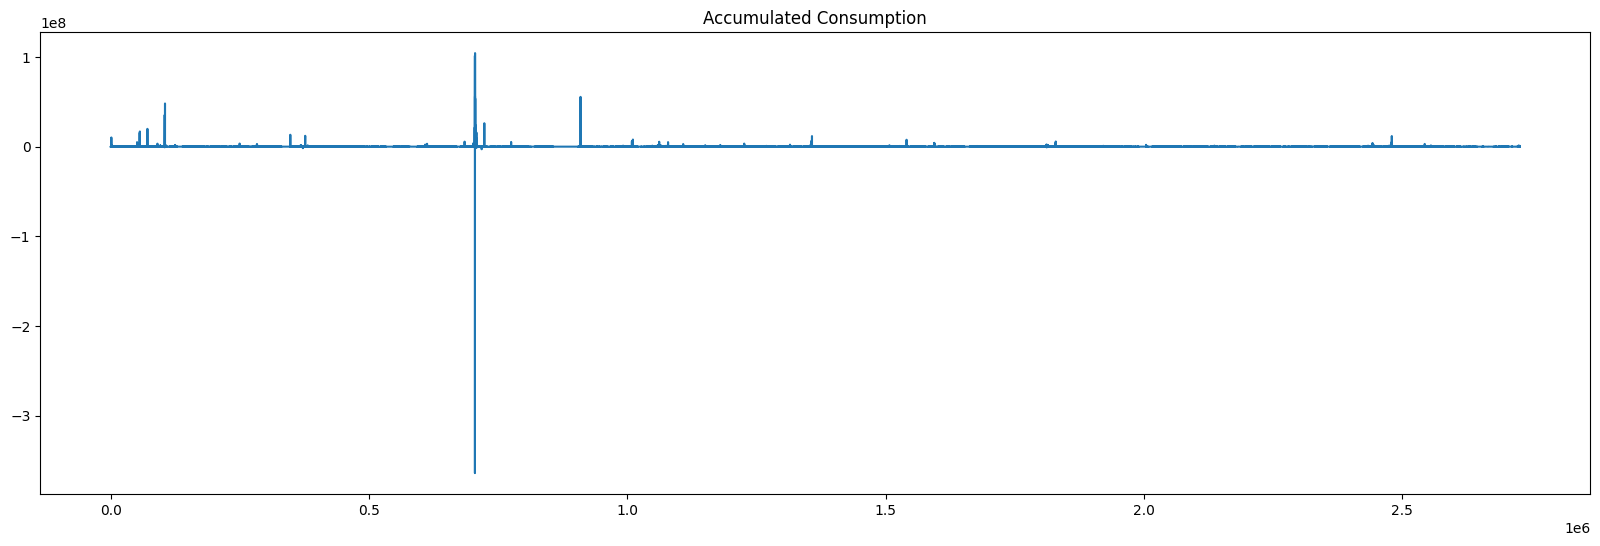

In [6]:
# plot the accumulated consumption to detect outliers
plt.figure(figsize=(20, 6))
plt.plot(df['Accumulated Consumption'])
plt.title('Accumulated Consumption')
plt.show()

In [7]:
# Drop all the accumulated consumption values below 0
df = df[df['Accumulated Consumption'] > 0]

In [8]:
df.describe()

,Number of Meters,Accumulated Consumption,Max Temperature,Min Temperature,Precipitation,Tourist Accommodations,Hotel Overnight Stays
count,2.719056e+06,2.719056e+06,2.719056e+06,2.719056e+06,2.719056e+06,2.719056e+06,2.719056e+06
mean,2.212636e+02,2.297878e+04,2.189202e+01,1.378303e+01,9.225469e-01,4.536275e+04,3.015443e+04
std,2.480662e+02,5.359958e+05,6.474325e+00,6.239103e+00,3.534839e+00,2.138164e+04,1.157637e+04
min,2.000000e+00,1.000000e+00,6.100000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.300000e+01,3.398000e+03,1.630000e+01,8.700000e+00,0.000000e+00,3.278400e+04,2.422500e+04
50%,6.500000e+01,7.155000e+03,2.170000e+01,1.345000e+01,0.000000e+00,5.004400e+04,3.326500e+04
75%,4.220000e+02,1.304800e+04,2.765000e+01,1.940000e+01,1.000000e-01,6.328400e+04,3.850400e+04
max,2.917000e+03,1.043230e+08,3.695000e+01,2.805000e+01,3.670000e+01,7.569500e+04,4.995800e+04


Now we see that the minimum is 2 and not -3

In [9]:
# There's a couple of observations with the Census Section and the District columns that are <NULL> and >. We will drop these rows
df = df[df['Census Section'] != '<NULL>']
df = df[df['District'] != '>']

In [10]:
# Save the cleaned dataset
df.to_csv('../data/local_data/cleaned_data.csv', index=False)

In [11]:
# Define the target column
target_variable = ["Accumulated Consumption"]

# Define the numerical variables
num_variables = ['District', 'Census Section', 'Number of Meters', 'Max Temperature', 'Min Temperature', 'Precipitation', 'Tourist Accommodations', 'Hotel Overnight Stays']

# Define the categorical ones
categorical_variables = ['Date', 'Use']

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Determine the number of rows and columns for the subplot grid
num_vars = len(num_variables)
cols = 2  # Two plots for each variable: boxplot and distribution plot
rows = num_vars  # One row for each variable

# Create a figure
fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))

# Box plots and distribution plots for numerical variables
for i, column in enumerate(num_variables):
    sns.boxplot(x='Accumulated Consumption', y=column, data=df, ax=axs[i, 0])
    axs[i, 0].set_title(f'Box plot of {column}')

    sns.histplot(data=df, x=column, hue='Accumulated Consumption', kde=True, element='step', ax=axs[i, 1])
    axs[i, 1].set_title(f'Distribution of {column} against consumption value')

# Adjust layout
plt.tight_layout()
plt.show()

KeyboardInterrupt: 